# Exercises of the eleventh week

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

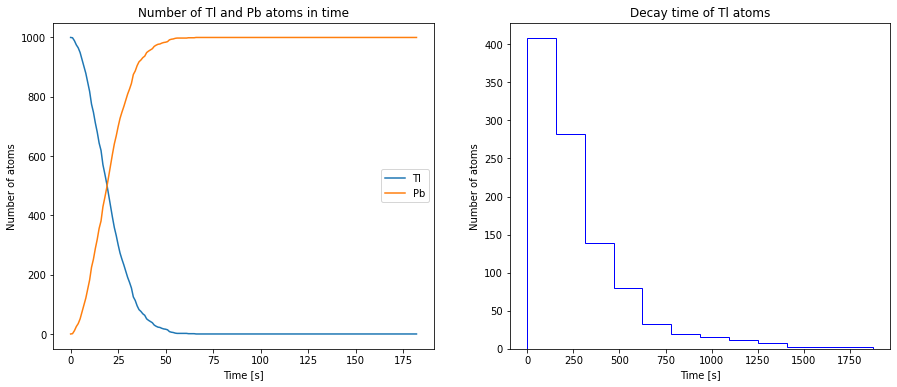

In [2]:
# defining quantities
tau = 3.052*60
tl = 1000  # Number of Tl atoms
pb = 0    # Number of Pb atoms
time = []
ytl = []
ypb = []

# defining decay probability
def prob(t):
    #would normally be this one but i was given a function to use so I'm using that one
    #return 1/tau*(np.log(2))
    return 1-(2**(-t/tau))

# for each time t:
for t in range(int(np.around(tau))):
    pr = prob(t)    # calculate the probability
    randy = np.random.rand(tl)    # generate random number
    mask = randy <= pr    # define the filter for those atoms that did decay
    
    randy[mask] = 1    # set array elements corresponding to decayed atoms to 1
    randy[np.logical_not(mask)] = 0    # non-decayed atoms set to 0

    pbt = np.count_nonzero(randy)    # count the number of atoms that decayed into Pb at this time
    pb = pb+pbt    # total number of Pb atoms
    tl = tl-pbt    # remaining number of Tl atoms
    
    # Generating lists for the plot
    time.append(t)
    ytl.append(tl)
    ypb.append(pb)
      
# List into array        
Tl = np.array(ytl)
Pb = np.array(ypb)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax1.plot(time,Tl,time,Pb)    # plot the number of Tl and Pb elements in function of time
ax1.legend(["Tl", "Pb"])
ax1.set_title("Number of Tl and Pb atoms in time")
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Number of atoms")

# inverse of cdf of p(t) (the second definition of p(t) in the text)
def icdf(x):
    return -tau*np.log2(1-x)

randy2 = np.random.random(1000)    # generating 1000 random numbers between 0 and 1
decaytime = icdf(randy2)    # applying the icdf to obtain a sample of generated events having varying decay time
ax2.hist(decaytime, bins=12, histtype="step", color="b")    # plot
ax2.set_title("Decay time of Tl atoms")
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Number of atoms")
ax2.plot()
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

<ipython-input-3-bb810d109053>:5: RuntimeWarning: divide by zero encountered in divide
  return np.sin(1/(1-t))**2
<ipython-input-3-bb810d109053>:5: RuntimeWarning: invalid value encountered in sin
  return np.sin(1/(1-t))**2


True integral: 1.346840 ± 0.002875
Hit/miss integral: 1.3458, error 0.0010401399999999672
Mean value integral: 1.3402227037640349, error 0.006617436235965224


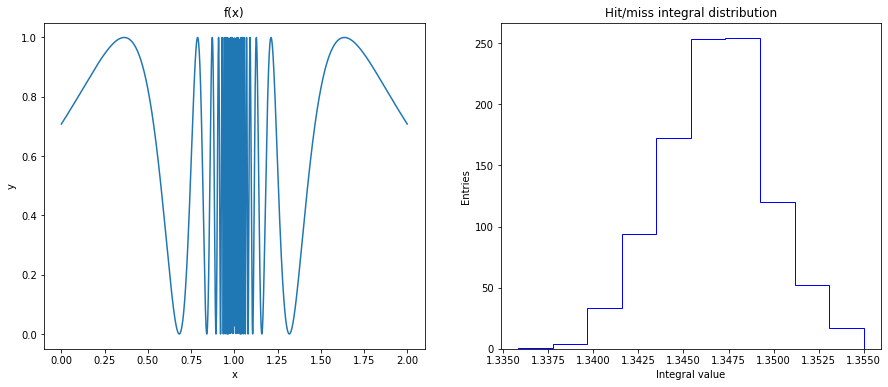

In [3]:
steps = 10001
x = np.linspace(0, 2, steps)

def f(t):   # defining function
    return np.sin(1/(1-t))**2

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
ax1.plot(x,f(x))    # plotting the function
ax1.set_title("f(x)")
ax1.set_xlabel("x")
ax1.set_ylabel("y")

N = 1000    # number of hit/miss integral calculations
shots = 100000    # number of randomly generated points in each calculation
intdata = np.zeros(N)    # array to store the data of the integrals

# calculation of the integral with the hit/miss method
for i in range(N):
    hit = 0
    for j in range(shots):
        xt = 2*np.random.rand()
        yt = np.random.rand()
        if yt < f(xt):
            hit += 1
        
    HMint = 2*(hit/shots)
    intdata[i] = HMint

# plotting the distribution of the calculated integrals
ax2.hist(intdata, histtype="step", color="b")
ax2.set_title("Hit/miss integral distribution")
ax2.set_xlabel("Integral value")
ax2.set_ylabel("Entries")

Tmean = np.mean(intdata)
Tsigma = np.std(intdata)

# calculation using the mean value method
xr = 2*np.random.rand(10001)
MVint = (2/steps)*np.sum(f(xr))

# output
print("True integral: %.6f ± %.6f" % (Tmean, Tsigma))
print("Hit/miss integral: " + str(intdata[0]) + ", error " + str(np.abs(Tmean-intdata[0])))
print("Mean value integral: " + str(MVint) + ", error " + str(np.abs(Tmean-MVint)))

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [4]:
# Defining f(x,y)
def f(x,y):
    if (x**2)+(y**2) <= 1:
        return 1
    else:
        return 0

# Defining 10D f(X)
def fg(X):
    if np.sum(X**2) <= 1:
        return 1
    else:
        return 0

steps = 10001
x = np.linspace(-1,1,steps)
y = np.linspace(-1,1,steps)

N = 100    # number of hit/miss integral calculations
shots = 100000    # number of randomly generated points in each calculation
intdata = np.zeros(N)

# Calculation
for i in range(N):
    hits = 0
    for j in range(shots):
        xt = 2*np.random.rand()-1
        yt = 2*np.random.rand()-1
        if f(xt,yt) == 1:
            hits += 1
    areat = 4*(hits/shots)
    intdata[i] = areat

area = np.mean(intdata)

print("2D circle area: %.6f, error %6f" % (area, np.abs(np.pi-area)))

# Same procedure for the 10D case
ndim = 10
dimensions = np.zeros((ndim,steps))    # Instead of using to distinct 1D arrays I use a single 10D array here 
for i in range(ndim):
    aux = np.linspace(-1,1,steps)
    dimensions[i] = aux

N10 = 100
shots10 = 100000

int10data = np.zeros(N)
for i in range(N10):
    hits = 0
    for j in range(shots10):
        X = 2*np.random.rand(10)-1
        if fg(X) == 1:
            hits += 1
    volumet = (2**ndim)*(hits/shots10)
    int10data[i] = volumet

volume = np.mean(int10data)

print("%iD sphere volume: %.6f, error %.6f" % (ndim, volume, np.abs(((np.pi**5)/120)-volume)))

2D circle area: 3.142174, error 0.000581
10D sphere volume: 2.536038, error 0.014126


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

Integral result: 0.838942


<ipython-input-5-f2e351ce7dc4>:3: RuntimeWarning: divide by zero encountered in power
  return x**(-(1/2))/(np.exp(x)+1)
<ipython-input-5-f2e351ce7dc4>:6: RuntimeWarning: divide by zero encountered in divide
  return 1/np.sqrt(x)


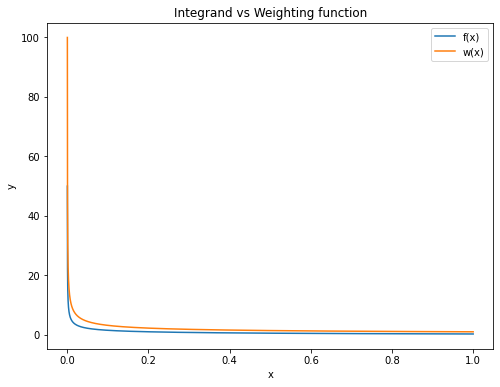

In [5]:
# Defining the integrand and the weighting function
def f(x):
    return x**(-(1/2))/(np.exp(x)+1)

def w(x):
    return 1/np.sqrt(x)

x = np.linspace(0,1,10001)

# plotting the 2 functions
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
ax.plot(x,f(x),x,w(x))
ax.legend(["f(x)", "w(x)"])
ax.set_title("Integrand vs Weighting function")
ax.set_xlabel("x")
ax.set_ylabel("y")

N = 100000    # Number of sampling points
yinvr = np.random.rand(N)    # Since the codomain of w(x) here is [1;+inf[, 1/w(x) must be ]0;1]
xr = yinvr**2    # Now x=(1/w(x))**2

fint = 2*np.sum(f(xr)/w(xr))/N    # Calculating integral with importance sampling method

print("Integral result: %.6f" % fint)